In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

import time
# Using regex to get date from query
import re
from matplotlib.pyplot import figure

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis 

In [37]:

precip_full_data = pd.read_sql("SELECT * FROM Measurement WHERE date>='2016-08-24'",conn)
precip_full_data.head() 
#precip_full_data.tail() 

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column


precip_data = pd.read_sql("SELECT date as Date,prcp as Precipitation FROM Measurement WHERE date>='2016-08-24'",conn)
#precip_data.head() 
#precip_data.tail() 

# Save the query results as a Pandas DataFrame and set the index to the date column
#precip_df = pd.DataFrame(precip_data, columns=['Date', 'Precipitation'])
#precip_df.set_index('Date', inplace=True, )
#precip_df.head() 




,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


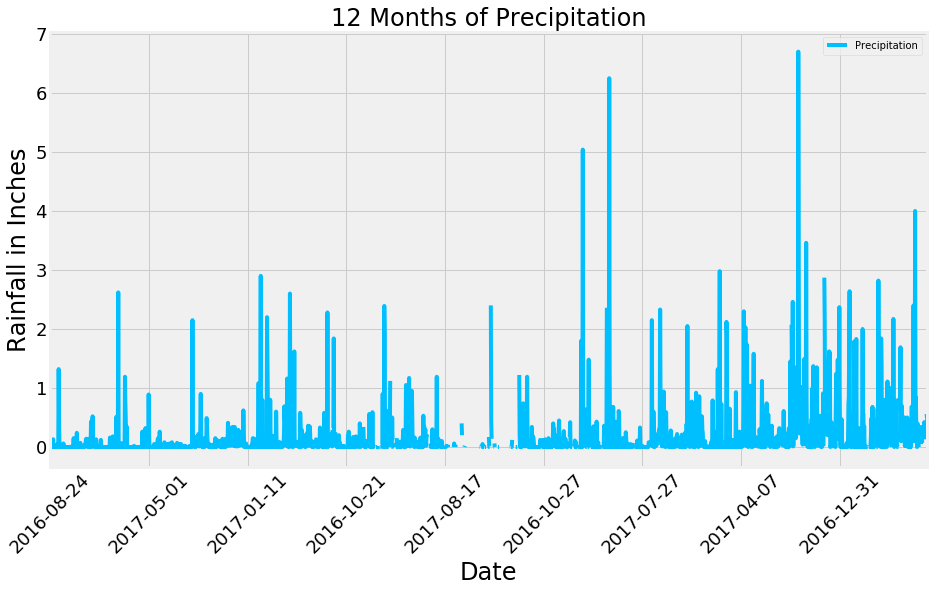

<Figure size 432x288 with 0 Axes>

In [16]:
##Use Matplotlib to plot the data  ##
#x_axis = precip_df['Date']
#y_axis = precip_df['Precipitation']

#plt.bar(x_axis, y_axis, color="b", align="center")

precip_df.plot(kind='line', figsize=(14,8), fontsize= 15, color='deepskyblue')
plt.title("12 Months of Precipitation", fontsize=24)
plt.ylabel("Rainfall in Inches", fontsize=24)
plt.xlabel("Date", fontsize=24)
plt.xticks(rotation=45, size=18)
plt.yticks(size=18)
plt.show()
plt.tight_layout()
plt.savefig("Images/Precipitation_Plot.png")



In [17]:
# Use Pandas to print the summary statistics for 
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [31]:
# Preview Station Table #
station_data = pd.read_sql("SELECT * FROM Station", conn)
station_data.head()



,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [32]:
# Design a query to show how many stations are available in this dataset?

Available_Statns = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations available.".format(Available_Statns))

There are 9 stations available.


In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

Act_Statns = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
#station_data['station'].value_counts()

print(f"The Most Active Stations are...")
Act_Statns 


The Most Active Stations are...


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

Lowest_Temp = precip_full_data['tobs'].min()
Highest_Temp = precip_full_data['tobs'].max()
Avg_Temp = precip_full_data['tobs'].mean()

print(f"Calculation of temperatures are a follows...")
print(f"Lowest Temperature recorded is {Lowest_Temp}")
print(f"Highest Temperature recorded is {Highest_Temp}")
print(f"Average of Temperatures recorded is {round(Avg_Temp,1)}")


Calculation of temperatures are a follows...
Lowest Temperature recorded is 58.0
Highest Temperature recorded is 87.0
Average of Temperatures recorded is 74.6


In [40]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Most_Active_Statns = Act_Statns[0][0] 
Most_Active_Statns



'USC00519281'

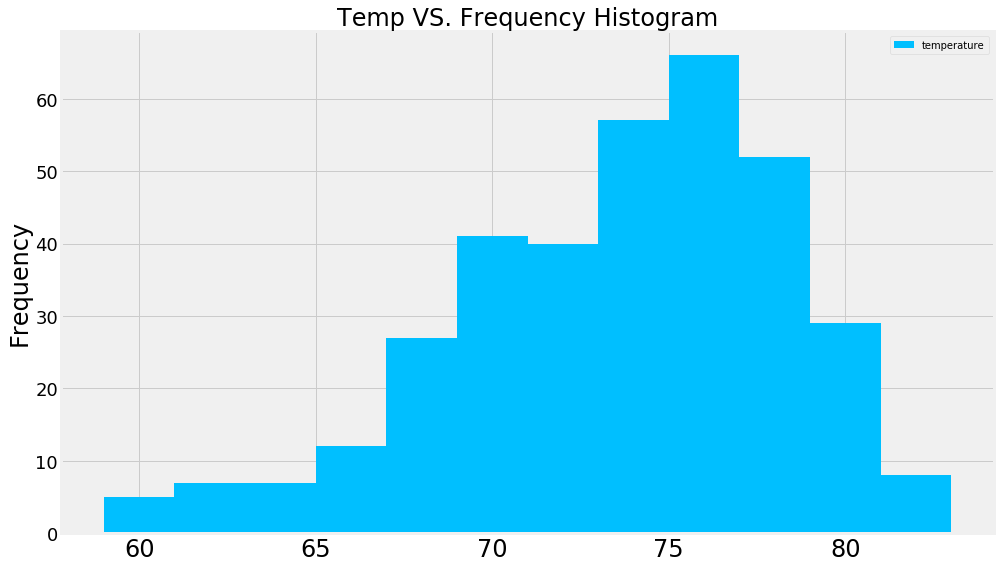

<Figure size 432x288 with 0 Axes>

In [43]:
Most_Temps_Station_obs = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-24').\
filter(Measurement.station == Most_Active_Statns).all()

Temp_Obs_df = pd.DataFrame(Most_Temps_Station_obs, columns=['temperature'])

Temp_Obs_df.plot.hist(bins=12,figsize=(14,8), fontsize= 24, color='deepskyblue')
plt.title("Temp VS. Frequency Histogram", fontsize=24)
plt.ylabel("Frequency", size=24)
plt.yticks(size=18)
plt.tight_layout()
plt.show()
plt.savefig("Images/Temp_Freq_Histogram.png")

In [44]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

Trip = calc_temps('2016-08-24', '2017-08-23')
Trip


[(58.0, 74.57894736842105, 87.0)]

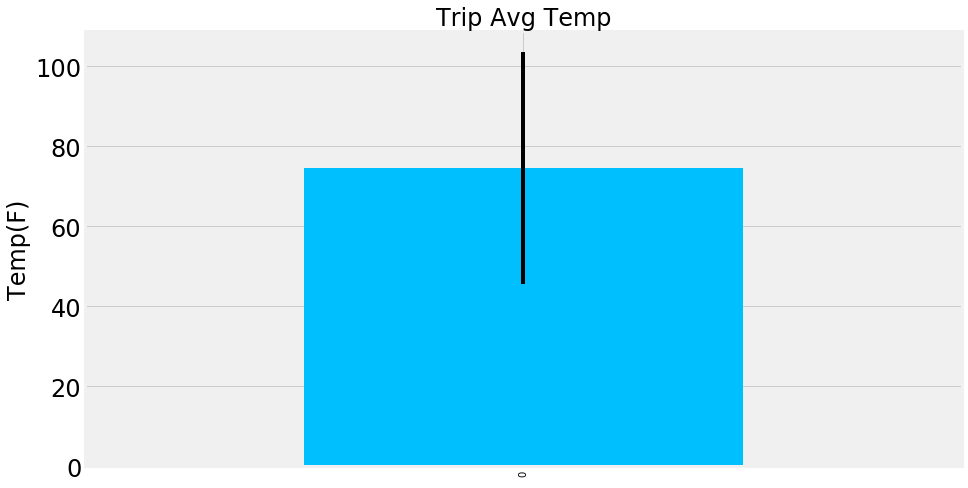

In [47]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



Trip_df = pd.DataFrame(Trip, columns=['TMIN', 'TAVE', 'TMAX'])
Trip_df.plot.bar(y="TAVE", yerr=(Trip_df["TMAX"] - Trip_df["TMIN"]),figsize=(14,8), color= 'deepskyblue')
plt.title('Trip Avg Temp', fontsize=24)
plt.ylabel("Temp(F)", fontsize=24)
plt.yticks(size=24)
plt.gca().legend_.remove()
plt.savefig("Images/Trip_Avg_Temp.png")


In [48]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precipitation(start_date, end_date):
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(f"The total amount of rainfall matching dates from previous year are as follows:")

print(precipitation('2016-08-24','2017-08-23'))


The total amount of rainfall matching dates from previous year are as follows:
[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 2.28), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2.15), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 2.15), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.45), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 1.22), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.08), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


## Optional Challenge Assignment

In [50]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


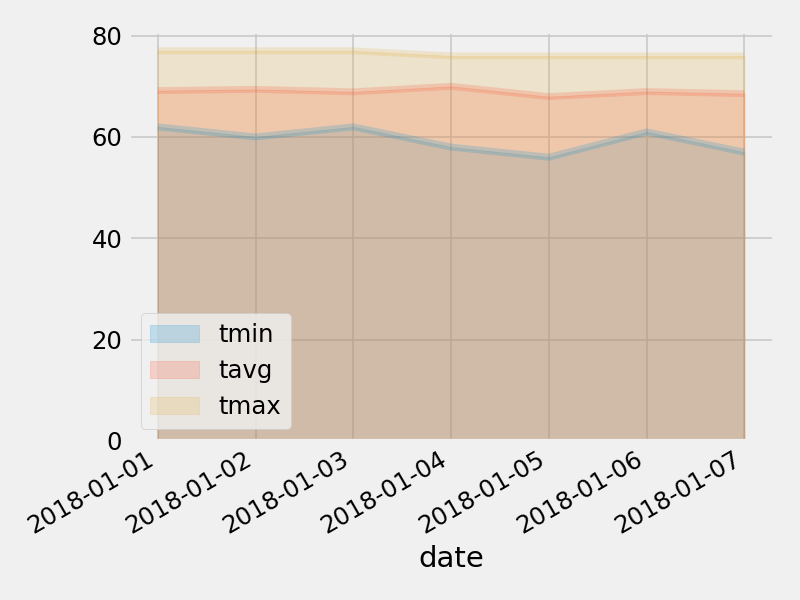

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
